In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# Read the Mouse and Drug Data and the Clinical Trial Data
m_csv = pd.read_csv("data/mouse_drug_data.csv")
c_csv = pd.read_csv("data/clinicaltrial_data.csv")

# Combine the data into a single dataset


# Display the data table for preview
m_csv.head()
c_csv.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
merge_table = pd.merge(c_csv, m_csv, on="Mouse ID", how='left')
merge_table
group = merge_table.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean().reset_index(drop=False)
# Convert to DataFrame
group_df = pd.DataFrame(group)
# Preview DataFrame
group_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint & Calculate standard error on means
group2 = merge_table.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].sem()
# Convert to DataFrame
group2_df = pd.DataFrame(group2).reset_index(drop=False)
# Preview DataFrame
group2_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames
pivot1 = pd.pivot_table(group_df,values='Tumor Volume (mm3)',columns='Drug',index='Timepoint')
pivot2 = pd.pivot_table(group2_df,values='Tumor Volume (mm3)',columns='Drug',index='Timepoint')
# Preview that Reformatting worked

Text(0, 0.5, 'Tumor Mass')

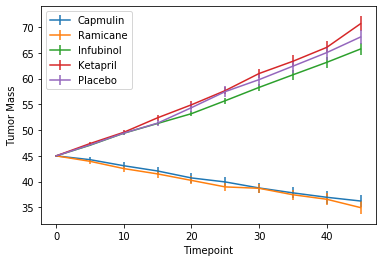

In [9]:
# Generate the Plot (with Error Bars)
plt.errorbar(pivot1.index,pivot1['Capomulin'],yerr=pivot2['Capomulin'],fmt="-")
plt.errorbar(pivot1.index,pivot1['Ramicane'],yerr=pivot2['Ramicane'],fmt="-")
plt.errorbar(pivot1.index,pivot1['Infubinol'],yerr=pivot2['Infubinol'])
plt.errorbar(pivot1.index,pivot1['Ketapril'],yerr=pivot2['Ketapril'])
plt.errorbar(pivot1.index,pivot1['Placebo'],yerr=pivot2['Placebo'])
plt.legend(loc="best", labels=['Capmulin','Ramicane','Infubinol','Ketapril','Placebo'])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Mass")

## Metastatic Response to Treatment

In [10]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
group3 = pd.DataFrame(merge_table.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean().reset_index(drop=False))
# Preview DataFrame
group3.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [11]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
group4 = pd.DataFrame(merge_table.groupby(['Drug','Timepoint'])['Metastatic Sites'].sem().reset_index(drop=False))
# Convert to DataFrame
# Preview DataFrame
group4.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [12]:
# Minor Data Munging to Re-Format the Data Frames
pivot3 = pd.pivot_table(group3,values='Metastatic Sites',columns='Drug',index='Timepoint')
pivot4 = pd.pivot_table(group4,values='Metastatic Sites',columns='Drug',index='Timepoint')
# Preview that Reformatting worked
pivot4

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


Text(0.5, 1.0, 'Metastatic Spread During Treatment')

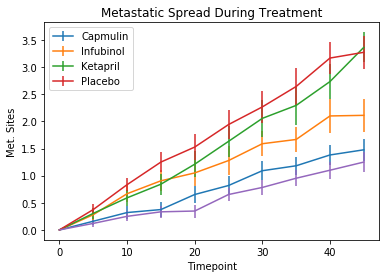

In [27]:
# Generate the Plot (with Error Bars)
# Save the Figure
# Show the Figure
plt.errorbar(pivot3.index,pivot3['Capomulin'],yerr=pivot4['Capomulin'])
plt.errorbar(pivot3.index,pivot3['Infubinol'],yerr=pivot4['Infubinol'])
plt.errorbar(pivot3.index,pivot3['Ketapril'],yerr=pivot4['Ketapril'])
plt.errorbar(pivot3.index,pivot3['Placebo'],yerr=pivot4['Placebo'])
plt.errorbar(pivot3.index,pivot3['Ramicane'],yerr=pivot4['Ramicane'])
plt.legend(loc="best", labels=['Capmulin','Infubinol','Ketapril','Placebo'])
plt.xlabel("Timepoint")
plt.ylabel("Met. Sites")
plt.title("Metastatic Spread During Treatment")

## Survival Rates

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice = pd.DataFrame(merge_table.groupby(['Drug','Timepoint'])['Mouse ID'].nunique())
# Convert to DataFrame

# Preview DataFrame
mice.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [15]:
# Minor Data Munging to Re-Format the Data Frames
mouse_pivot = pd.pivot_table(mice,values='Mouse ID',columns='Drug',index='Timepoint')
# Preview the Data Frame
mouse_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17


In [22]:
perc = (mouse_pivot[['Capomulin','Infubinol','Ketapril','Placebo','Ramicane']]/25)*100

Text(0.5, 1.0, 'Mice Survival Rate During Treatment')

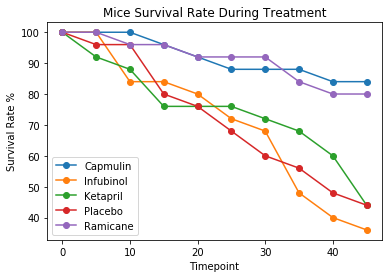

In [23]:
plt.plot(perc, marker='o')
plt.legend(loc="best", labels=['Capmulin','Infubinol','Ketapril','Placebo','Ramicane'])
plt.xlabel("Timepoint")
plt.ylabel("Survival Rate %")
plt.title("Mice Survival Rate During Treatment")

## Summary Bar Graph

In [24]:
# Calculate the percent changes for each drug
start_df = group_df.loc[group_df['Timepoint']==group_df['Timepoint'].min()]
end_df = group_df.loc[group_df['Timepoint']==group_df['Timepoint'].max()]
del start_df['Timepoint']
del end_df['Timepoint']
end_df
# Display the data to confirm

,Drug,Tumor Volume (mm3)
9,Capomulin,36.236114
19,Ceftamin,64.132421
29,Infubinol,65.755562
39,Ketapril,70.662958
49,Naftisol,69.265506
59,Placebo,68.084082
69,Propriva,66.258529
79,Ramicane,34.955595
89,Stelasyn,68.438310
99,Zoniferol,65.960888


In [25]:
start_df = merge_table.loc[merge_table['Timepoint'] == 0]
start_df = start_df[['Mouse ID','Tumor Volume (mm3)','Drug']]
end_df = merge_table.loc[merge_table['Timepoint'] == 45]
end_df = end_df[['Mouse ID','Tumor Volume (mm3)','Drug']]

start_and_end_df = start_df.merge(end_df, how = 'left', on = 'Mouse ID')
del start_and_end_df['Drug_y']


start_and_end_df.columns = ['Mouse ID', 'Timepoint 0 Volume', 'Drug','Timepoint 45 Volume']
start_and_end_df['Pct Change'] = ((start_and_end_df['Timepoint 45 Volume'] - start_and_end_df['Timepoint 0 Volume']) / start_and_end_df['Timepoint 0 Volume']) * 100
    
final = pd.DataFrame(start_and_end_df.groupby(['Drug'])['Pct Change'].mean())
final.reset_index()

,Drug,Pct Change
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


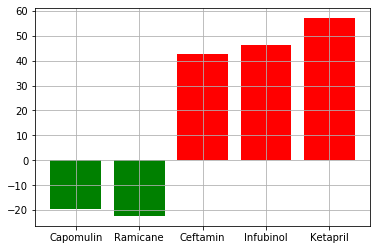

In [26]:
# Store all Relevant Percent Changes into a Tuple
negative = [final['Pct Change'][0],final['Pct Change'][7]]
positive = [final['Pct Change'][1],final['Pct Change'][2],final['Pct Change'][3]]
# Splice the data between passing and failing drugs
n_labels = ['Capomulin','Ramicane']
p_labels = ['Ceftamin','Infubinol','Ketapril']
# Orient widths. Add labels, tick marks, etc. 

plt.bar(n_labels,negative,color='green')
plt.bar(p_labels,positive,color='red')
plt.grid()